In [1]:
import pandas as pd


In [2]:
# Recombramos las columnas 
df_car = pd.read_csv('car_evaluation.csv', header=None)
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
df_car.columns = col_names

In [3]:
#Separamos en X e y
X = df_car.drop('class', axis=1)
Y = df_car['class']  # Recordar que para evitar dilemas podemos dejar esta variablce en tipo objeto o categorica sin conversion

In [4]:
# Ya que todas nuestras variables son categoricas, camos a utilizar una codificacion por columna sin separar las categorias de cada una  (diferente del onehot-enconder)

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
X = pd.DataFrame(ord_enc.fit_transform(X), columns=X.columns)
X

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0
1724,1.0,1.0,3.0,2.0,1.0,0.0
1725,1.0,1.0,3.0,2.0,0.0,1.0
1726,1.0,1.0,3.0,2.0,0.0,2.0


In [5]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=69)


In [6]:
rf = RandomForestClassifier(n_estimators=10, random_state=69)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=69)

In [7]:
from sklearn.metrics import accuracy_score

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

train_accuracy, test_accuracy

(1.0, 0.9441233140655106)

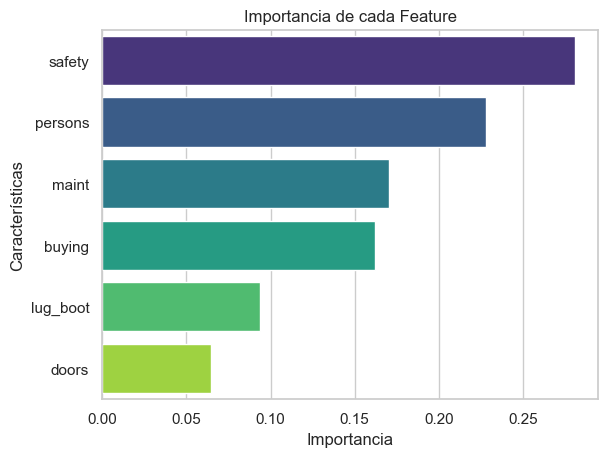

In [8]:
#Verificamos el feature importances

import seaborn as sns
import matplotlib.pyplot as plt

# Obtenemos las importancias de las características
importances = pd.Series(rf.feature_importances_, index=X.columns.values).sort_values(ascending=False)

# Configuramos la paleta de colores y la saturación
sns.set(style="whitegrid")  # Configuración del estilo
palette = sns.color_palette("viridis", len(importances))  # Paleta de colores personalizada

# Creación del gráfico de barras
sns.barplot(x=importances, y=importances.index, palette=palette, hue=importances.index, saturation=0.9, legend=False)

# Añadimos título y etiquetas
plt.title('Importancia de cada Feature')
plt.xlabel('Importancia')
plt.ylabel('Características')

# Mostramos el gráfico
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm

array([[101,   1,   9,   0],
       [  4,  16,   0,   0],
       [ 11,   0, 359,   0],
       [  4,   0,   0,  14]], dtype=int64)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         acc       0.84      0.91      0.87       111
        good       0.94      0.80      0.86        20
       unacc       0.98      0.97      0.97       370
       vgood       1.00      0.78      0.88        18

    accuracy                           0.94       519
   macro avg       0.94      0.86      0.90       519
weighted avg       0.95      0.94      0.94       519



In [10]:
from tools_ml import recursos_graficos as rg 

rg.histogram(df_car, 'class')
